## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print(X.isnull().any().any(), X.isna().any().any(), sep='\n')

False
False


В наборе данных нет пропущенных значений

Найдем есть ли категориальные колонки в датасете

In [4]:
list(set(X.columns) -  set(X._get_numeric_data().columns))

[]

Нет, категориальных переменных нет

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=89)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

Для начала масштабируем данные через StandardScaler:

In [6]:
X_train_objects, X_test_objects = X_train[['alcohol', 'magnesium']], X_test[['alcohol', 'magnesium']]
scaler = StandardScaler() 
scaler.fit(X_train_objects)
X_train_objects_new = scaler.transform(X_train_objects) 
X_test_objects_new = scaler.transform(X_test_objects) 

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Зафитим модель именно таким образом для удобства использования в последующем номере при построении графика. Используем евклидово расстояние.

In [8]:
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean').fit(X_train_objects_new, y_train)
clf3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean').fit(X_train_objects_new, y_train)
clf5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train_objects_new, y_train)
clf10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean').fit(X_train_objects_new, y_train)
clf15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean').fit(X_train_objects_new, y_train)
clf25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean').fit(X_train_objects_new, y_train)

In [9]:
cl = [clf1, clf3, clf5, clf10, clf15, clf25]
neighs = [1, 3, 5, 10, 15, 25]

In [10]:
accuracy_list_test, accuracy_list_train = [], []
for c in cl:
    y_predicted_test = c.predict(X_test_objects_new)
    y_predicted_train = c.predict(X_train_objects_new)
    accuracy_list_test.append(round(np.mean(y_predicted_test==y_test), 2))
    accuracy_list_train.append(round(np.mean(y_predicted_train==y_train), 2))

In [11]:
stat = pd.DataFrame({'NN': neighs, 'Train': accuracy_list_train,
                      'Test': accuracy_list_test})
print(stat.to_string(index=False, justify='left', col_space=5))

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_string.html

 NN    Train  Test
  1    0.99   0.67
  3    0.82   0.61
  5    0.81   0.67
 10    0.76   0.69
 15    0.76   0.67
 25    0.75   0.67


Наибольшая точность на тестовой выборке при 10 (доля верных ответов: 0.69)

**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [109]:
!pip install mlxtend

^C


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [12]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

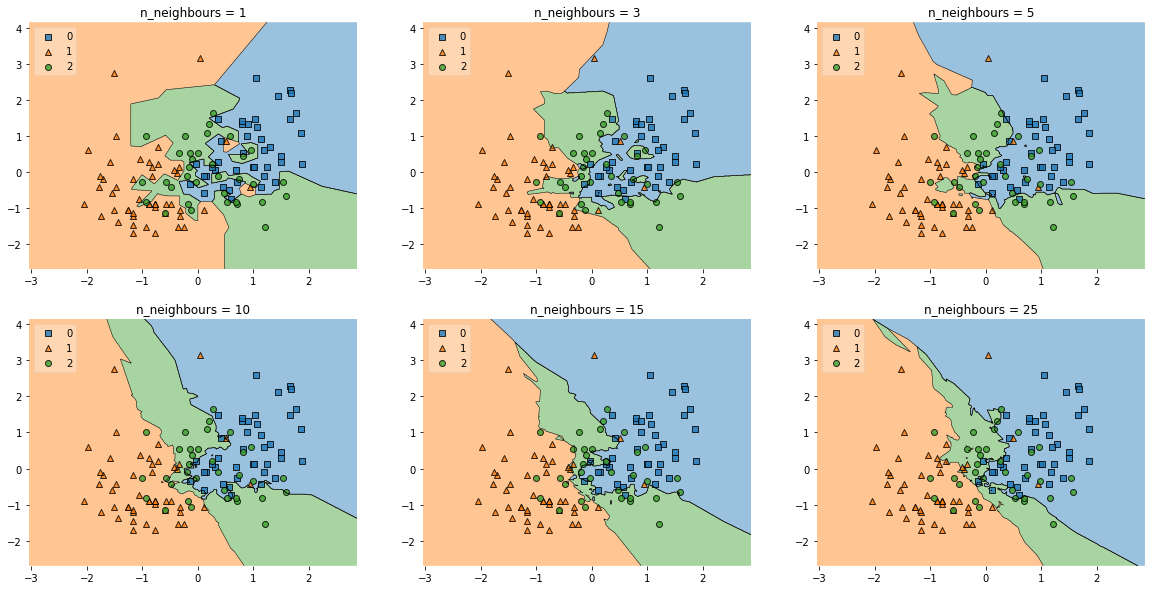

In [111]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 
          'n_neighbours = 10', 'n_neighbours = 15', 
          'n_neighbours = 25']
for clf, lab, grd in zip(cl,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_objects_new, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Проверим соблюдается ли баланс классов или наблюдается сильный перевес по количеству того или иного класса. Убедимся, что сильного дисбаланса классов не наблюдается.

In [15]:
print(f'0 type: {len(np.where(y == 0)[0])}', f'1 type: {len(np.where(y == 1)[0])}',
      f'2 type: {len(np.where(y == 2)[0])}', sep='\n')

0 type: 59
1 type: 71
2 type: 48


Для обучения классификатора оптимальнее использовать 10 соседей, для которых доля верных ответов максимальная (сильного дисбаланса в пользу определенного класса не наблюдается, следовательно, эта метрика является достаточно информативной). Тот же самый вывод можно сделать по получаемой решающей поверхности, где классы разделены лучшим образом, почти все представители классов распределены внутри своих зон и в то же время модель несильно переобучилась в отличие от случаев меньшего количества соседей.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

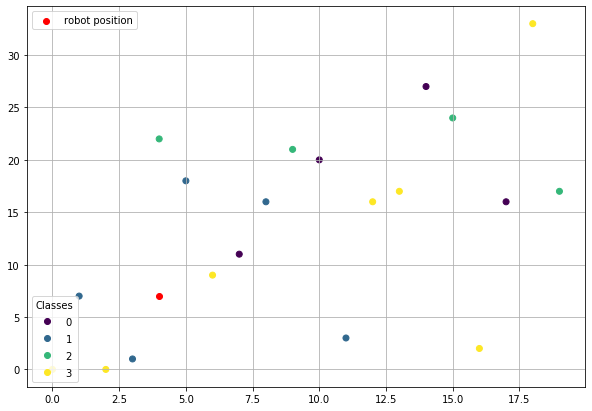

In [2]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean').fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        p_right = 0.2
        s = np.random.binomial(n=1, p=p_right, size=1)
        if s[0] == 1:
            position = self.trajectory[-1] + self.mapping[0]
        else:
            pred = self.knn.predict([self.trajectory[-1]])
            position = self.trajectory[-1] + self.mapping[pred[0]]
        self.trajectory = np.vstack((self.trajectory, position)) 

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [14]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.reshape(robot.trajectory, (-1, 2))
    
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
    
#https://stackoverflow.com/questions/12575421/convert-a-1d-array-to-a-2d-array-in-numpy    

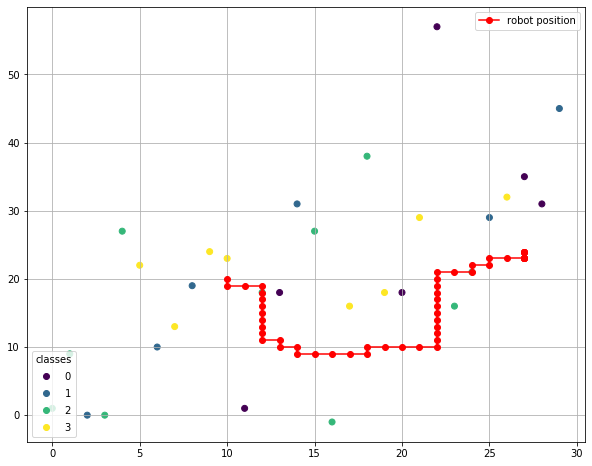

In [15]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

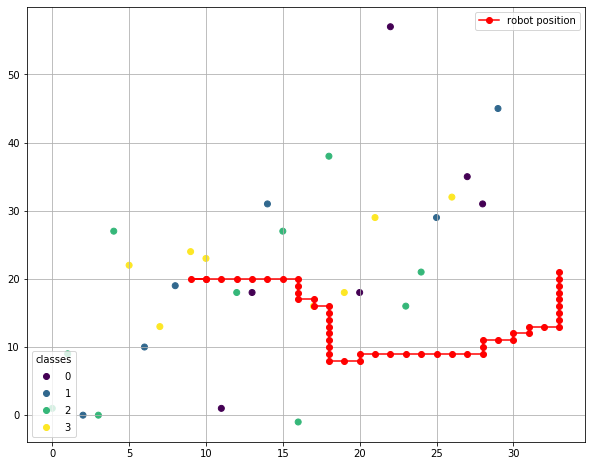

In [126]:
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)

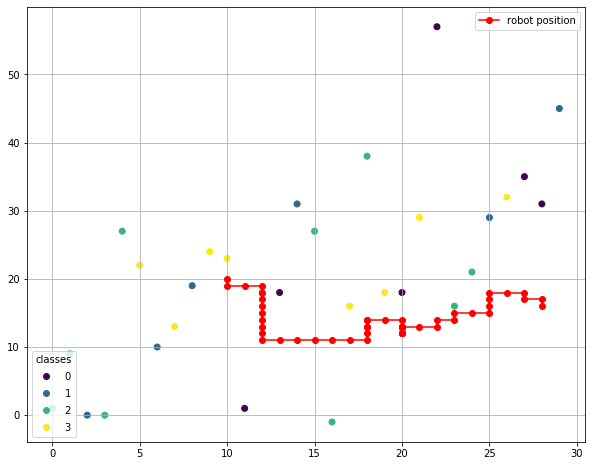

In [35]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

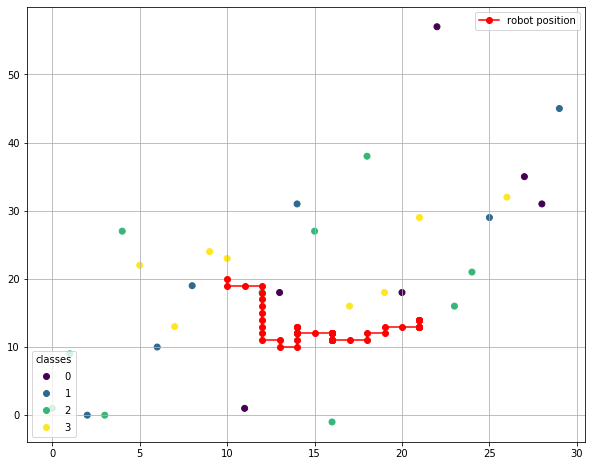

In [36]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

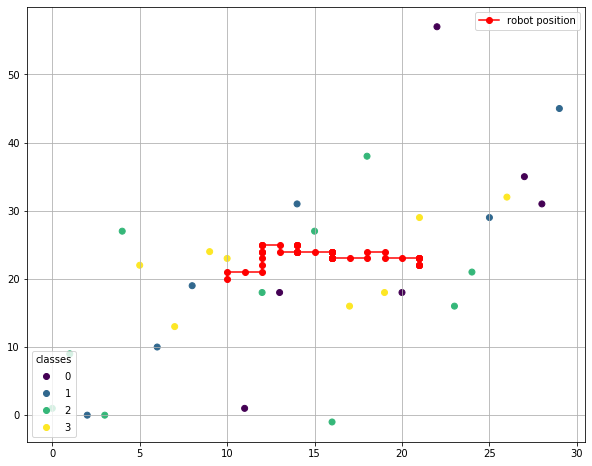

In [16]:
conduct_experiment(x, mean = 3, std = 10, k = 25, n_movements = 50)

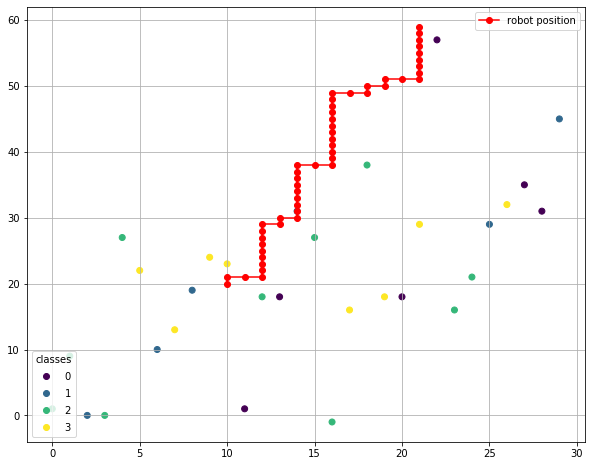

In [17]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

Заметно, что робот в любом случае движется в правом направлении. Ведь помимо оценки с помощью ближайших соседей, с вероятностью 0.2 робот ходит вправо независимо от того, какие соседи рядом.

В основном, траектория движения определяется самыми ближними соседями к начальной точке со значительным сдвигом вправо. Сложно оценить, как влияют дальние точки на передвижения робота. Направление его движения зависит от того, какие точки окружают изначально около стартовой точки, ведь справа от начальной точки намного больше точек, чем слева. Следовательно, при небольшом количестве соседей траектория движения робота может быть длинее. Но подобная тенденция наблюдается лишь пока увеличиваем соседей до определенного числа.

Казалось бы, число соседей влияло на длину траектории движения робота, ведь при увеличении количества соседей с 10 до 25 траектория уменьшалась или оставалась примерно одинаковой при увеличении числа соседей, однако при последующем увеличении до учета всех соседей траектория стала очень длинной. Это показывает, что длина случайно определяемой траектории не зависит от числа соседей.

Если бы классы назначались осмысленно, а не случайным образом, то траектория могла бы зависеть от количества соседей рядом, но в большей степени напоминало бы случайное блуждание.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [3]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [4]:
print(data.isnull().any().any(), data.isna().any().any(), sep='\n')

False
False


В данных нет пропусков.

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [5]:
data = data.drop(['Unnamed: 0'], axis=1)

Удалили столбец, дублировавший индексы. 

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [6]:
import seaborn as sns

In [7]:
cat_features_mask = (data.dtypes == "object").values
X_real = data[data.columns[~cat_features_mask]]

Представим корреляцию вещественных признаков с тагретом

In [8]:
print('Correlation with target')
print(X_real.corrwith(X_real['price']))

Correlation with target
carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64


Построим матрицу корреляций, чтобы увидеть, как признаки коррелируют между собой.

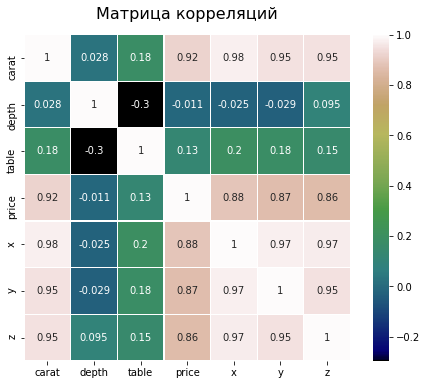

In [9]:
colormap = plt.cm.gist_earth
plt.figure(figsize=(8,6))

plt.title('Матрица корреляций', y=1.03, size=16)
sns.heatmap(X_real.astype(float).corr(method='pearson'),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True);

# график построен по образу и подобию того, что был в семинарской тетрадке

Больше всего с целевой переменной коррелируют такие переменные как караты, измерения x, y и z. Можно заметить, что многие переменные сильно коррелированы друг с другом.

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [10]:
X_new = pd.get_dummies(data, drop_first=True)
X_new

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [11]:
predictors = X_new.drop(['price'], axis=1)
target = data['price']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(predictors, target, test_size=0.3, random_state=123)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [12]:
scaler_3 = StandardScaler() 
scaler_3.fit(X_train_3)
X_train_standrd = scaler_3.transform(X_train_3) 
X_test_standrd  = scaler_3.transform(X_test_3) 

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [14]:
lr = LinearRegression()
lr.fit(X_train_standrd, y_train_3)  
train_pred = lr.predict(X_train_standrd)
test_pred = lr.predict(X_test_standrd)

In [15]:
MSE_train = mean_squared_error(y_train_3, train_pred)
MSE_test = mean_squared_error(y_test_3, test_pred)
print(f'MSE_train: {MSE_train}',
      f'MSE_test: {MSE_test}', sep='\n')

MSE_train: 1270791.8536412274
MSE_test: 1291193.8989862849


На тестовой выборке среднеквадратичная ошибка выше, что свидетельствует о переобученности модели. В то же время у нас есть выбросы в данных, и от того попали ли они в тестовую или тренировочную выборки зависит качество.

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [16]:
lr.coef_

array([ 5.30771734e+03, -9.09093019e+01, -6.30227446e+01, -1.08975649e+03,
        3.46573300e-01, -4.02044976e+01,  1.77312094e+02,  4.20765029e+02,
        3.44490788e+02,  3.11980757e+02, -8.79414334e+01, -1.05976741e+02,
       -2.04567200e+02, -3.53412331e+02, -4.52127949e+02, -5.25758304e+02,
        9.59220402e+02,  1.59252523e+03,  1.03876169e+03,  1.65936272e+03,
        1.81447342e+03,  1.28019653e+03,  1.45614766e+03])

In [17]:
coefficients = pd.concat([pd.DataFrame(predictors.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1, join='inner', ignore_index=True)
coefficients.rename(columns={0:'feature', 1:'Linear Regression coef'})

#https://stackoverflow.com/questions/26951880/scikit-learn-linear-regression-how-to-get-coefficients-respective-features

,feature,Linear Regression coef
0,carat,5307.717343
1,depth,-90.909302
2,table,-63.022745
3,x,-1089.756486
4,y,0.346573
5,z,-40.204498
6,cut_Good,177.312094
7,cut_Ideal,420.765029
8,cut_Premium,344.490788
9,cut_Very Good,311.980757


Оценки для вещественных переменных: carat, x, clarity_VS2, clarity_VS1, clarity_VVS2, clarity_SI1, clarity_VVS1 на порядок превыщают оценки для дугих вещественных переменных.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [18]:
ridge = Ridge(alpha=10).fit(X_train_standrd, y_train_3)
lasso = Lasso(alpha=10).fit(X_train_standrd, y_train_3)

In [19]:
coefficients = pd.concat([pd.DataFrame(predictors.columns), pd.DataFrame(np.transpose(lr.coef_)), pd.DataFrame(np.transpose(ridge.coef_)), pd.DataFrame(np.transpose(lasso.coef_))], axis = 1, join='inner', ignore_index=True)
coefficients.rename(columns={0:'feature', 1: 'Linear Regression coef', 2:'Ridge coef', 3:'Lasso coef'})

,feature,Linear Regression coef,Ridge coef,Lasso coef
0,carat,5307.717343,5270.623943,4825.591889
1,depth,-90.909302,-89.294951,-100.045814
2,table,-63.022745,-63.214765,-73.612934
3,x,-1089.756486,-1049.459601,-659.976427
4,y,0.346573,-1.696406,-0.000000
5,z,-40.204498,-43.543168,-33.748132
6,cut_Good,177.312094,177.606753,48.466806
7,cut_Ideal,420.765029,421.414874,207.416634
8,cut_Premium,344.490788,345.135106,152.773649
9,cut_Very Good,311.980757,312.910240,136.237880


Веса уменьшились, но незначительно. Многие признаки были сильно коррелированы, о чем свидетельствует наличие почти линейной зависимости между некоторыми переменными в матрице корреляций (corr(carat, x) = 0.98, corr(x,z) = 0.97, etc). В изначальной регрессии проблема мультиколлинеарности проявлялась сильно, регуляризация с гиперпараметром альфа, равным 10, не особо решила данную проблему, однако при увеличении значения гиперпараметра модель будет приближаться к константной. Следовательно, стоит подобрать оптимальное значение гиперпараметра альфа. 

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [20]:
alphas = [0.1, 1, 10, 100, 200]
r, l = [], []
for a in alphas:
    rid = np.linalg.norm(Ridge(alpha=a).fit(X_train_standrd, y_train_3).coef_)
    las = np.linalg.norm(Lasso(alpha=a).fit(X_train_standrd, y_train_3).coef_)
    r.append(rid)
    l.append(las)    

Построим график, чтобы показать изменение евклидовой нормы весов от гиперпараметра альфа.

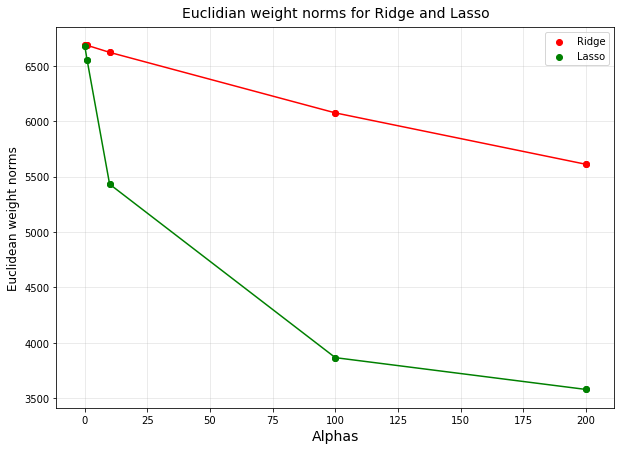

In [21]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.scatter(alphas, r, c='r', label='Ridge')
ax.scatter(alphas, l, c='g', label='Lasso')
ax.set_xlabel('Alphas', fontsize=14)
ax.set_ylabel('Euclidean weight norms', fontsize=12)
plt.plot(alphas, r,'-o', c='r')
plt.plot(alphas, l,'-o', c='g')
plt.title('Euclidian weight norms for Ridge and Lasso', y=1.01, fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

Агрессивнее уменьшает веса регуляризатор Lasso, он зануляет некоторые веса, поэтому его и используют для отбора признаков, особенно для данных, где сильная мультиколлинеарность.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [22]:
from sklearn.linear_model import LassoCV

In [23]:
regr = LassoCV(cv=5, alphas=alphas,n_jobs=-1, tol=2e-4, max_iter=10000, random_state=1000).fit(X_train_standrd, y_train_3)

In [36]:
ald = list(regr.alphas_)
nm = list(range(0, len(ald)))

for i, j in zip(ald,nm):
    print(f'𝛼 = {i} MSE={regr.mse_path_.mean(axis=0)[j]}')

𝛼 = 200.0 MSE=1593500.4965919578
𝛼 = 100.0 MSE=1535508.5506931639
𝛼 = 10.0 MSE=1633258.298039547
𝛼 = 1.0 MSE=1537423.3664016302
𝛼 = 0.1 MSE=1540884.5474080597


Отсюда выберем 𝛼=1 для регуляризации Lasso. Мы выбираем по тренировочной выборке, поэтому при небольшом различии MSE в пользу 𝛼=100 лучше выбрать все же 𝛼=1, потому что при большом значении гиперпараметра модель приближается к константной, слишком жесткий отбор признаков и многие
из них просто зануляются. При этом качество на тесте (при 𝛼=100) почти наверное хуже, чем у простой регрессии без регуляризации с оптимальным гиперпараметром.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [37]:
Lasso_reg = Lasso(alpha=1).fit(X_train_standrd, y_train_3)

In [40]:
coefficients = pd.concat([pd.DataFrame(predictors.columns), pd.DataFrame(np.transpose(Lasso_reg.coef_)), pd.DataFrame(np.transpose(lasso.coef_)), pd.DataFrame(np.transpose(lr.coef_)), pd.DataFrame(np.transpose(ridge.coef_))], axis = 1, join='inner', ignore_index=True)
coefficients.rename(columns={0:'feature', 1: 'Lasso with a=1', 2: 'Lasso with a=10', 3: 'Linear Regression' , 4:'Ridge'})

,feature,Lasso with a=1,Lasso with a=10,Linear Regression,Ridge
0,carat,5259.479121,4825.591889,5307.717343,5270.623943
1,depth,-91.836082,-100.045814,-90.909302,-89.294951
2,table,-64.079225,-73.612934,-63.022745,-63.214765
3,x,-1046.564711,-659.976427,-1089.756486,-1049.459601
4,y,-0.000000,-0.000000,0.346573,-1.696406
5,z,-39.469813,-33.748132,-40.204498,-43.543168
6,cut_Good,164.532145,48.466806,177.312094,177.606753
7,cut_Ideal,399.618347,207.416634,420.765029,421.414874
8,cut_Premium,325.477093,152.773649,344.490788,345.135106
9,cut_Very Good,294.566353,136.237880,311.980757,312.910240


Значения весов при регуляризации с гиперпараметром 𝛼=1 слегка больше чем аналогичные веса при регуляризации Лассо с 𝛼=10, потому что происходит менее "сильный" отбор признаков. В то же время, веса уменьшились по сравнению с регуляризацией Ridge и обычной регрессией. Такой признак как "y" алмаза полностью занулился (хотя его вес итак был крайне малым), значения всех остальных стали меньше по модулю. Но веса все же остались очень большими, проблема переобученности сохраняется. Наша модель еще далека от робастной. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [41]:
y_lasso_pred = Lasso_reg.predict(X_test_standrd)
MSE_test_lasso = mean_squared_error(y_test_3, y_lasso_pred)
print(f'MSE Lasso: {MSE_test_lasso}', f'MSE Linear Regr: {MSE_test}', sep='\n')

MSE Lasso: 1290690.876729883
MSE Linear Regr: 1291193.8989862849


В данном случае лучше всего использовать Lasso, подобрав оптимальный гиперпараметр альфа получилось улучшить качество модели. В то же время в данных присутствуют большие выбросы, поэтому при изменении random_seed у нас может сильно измениться качество модели, что не есть хорошо. В зависимости от того попадут ли эти выбросы в тестовую или в тренировочную выборку зависит качество модели на тесте.

Для получения аккуратных результатов следует убрать выбросы из данных и/или использовать другой фукционал ошибок (MSE сильно реагирует на выбросы, использование MAE или функции потерь Хубера могло бы более точно дать оценку качества модели).